*Dika Maulidal*


---

## **Text Analytics - Kaskus FUFUFAFA**
**Text analytics** adalah proses menganalisis potongan data yang tidak terstruktur untuk menemukan informasi dan insight yang sebelumnya belum ditemukan yang dapat dimanfaatkan untuk pengambilan keputusan dan proses lainnya.

**Overview :**

*   Sentiment Analyis
*   Time Series Analysis
*   Wordcloud
*   Bigram

## Import Library dan Data

Import Dataset yang akan digunakan untuk melakukan Text Analytics dan juga Import Library yang di butuhkan

In [1]:
import pandas as pd # Import Library Pandas sebagai alias pd untuk melakukan pemrosesan data menggunakan dataframe
import matplotlib.pyplot as plt # import library matplotlib sebagai plt untuk melakukan visualisasi data
import seaborn as sns # import juga library tambahan untuk melakukan visualisasi data

In [2]:
from google.colab import files
uploaded = files.upload()  # Pilih file CSV Anda

Saving Kaskus_FUFUFAFA.csv to Kaskus_FUFUFAFA (2).csv


In [3]:
# Membaca data CSV
df = pd.read_csv(next(iter(uploaded.keys())))
df.head() # cek 5 data teratas

,Date,Replied To,Thread Title,Post Content
0,14-11-2019 09:54,beritafilistin,Perekam Wanita di Kamar Ganti Baju Mall Kerap ...,Dia pasti alumni 212
1,01-10-2019 17:38,ibelindua,Gubernur Anies Sampaikan Ancaman Penggantian I...,Gak pernah ngaca ya
2,28-09-2019 10:56,matadewa909,"Kecewa Ponakan Prabowo Batal Baca Doa, Gerindr...",Alumni 212 mana suaranya
3,17-09-2019 12:41,SENORITA88,"Pria India Bikin Helm Pakai AC, Kepala Dingin ...",Malah masuk angin ntar
4,28-08-2019 13:45,matthysse76,"Jokograd & Mandalanusa, Usulan Nama Ibu Kota B...",Wowoland city of kamprets


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1969 non-null   object
 1   Replied To    1944 non-null   object
 2   Thread Title  1969 non-null   object
 3   Post Content  1969 non-null   object
dtypes: object(4)
memory usage: 61.7+ KB


In [5]:
df.columns

Index(['Date', 'Replied To', 'Thread Title', 'Post Content'], dtype='object')

In [6]:
df.isnull().sum()

,0
Date,0
Replied To,25
Thread Title,0
Post Content,0


# **Pre- Processing**

Tahapan untuk menghilangkan beberapa permasalahan yang bisa mengganggu saat pemrosesan data. Hal tersebut karena banyak data yang formatnya tidak konsisten. Data preprocessing merupakan teknik paling awal sebelum melakukan analisa.

**Tahapan :**



*   Stopwords
*   Casefolding
* Remove URL
* Hapus Tanda Baca



In [7]:
import string
import re

# Stopwords manual
manual_stopwords = ["kaskus", "id", "images", "png", "http", "https", "yang", "yg", "iya", "gak", "ada", "adalah", "tegas","rp", "ya","aja","lo","gan", "gw", "ane", "kalo","udah","tuh","ga", "si","nih","nya"]
# Baca stopwords tambahan dari file txt
with open('/content/stopwords_id.txt', 'r') as file:
    file_stopwords = file.read().splitlines()

# Gabungkan stopwords
all_stopwords = set(manual_stopwords + file_stopwords)

def preprocess_thread_title(text):
    # 1. Ubah ke huruf kecil
    text = text.lower()
    # 2. Hapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # 3. Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 4. Hapus stopwords
    text = ' '.join(word for word in text.split() if word not in all_stopwords)
    return text

In [8]:
df['Post Clean'] = df['Post Content'].apply(preprocess_thread_title)
df.head()

,Date,Replied To,Thread Title,Post Content,Post Clean
0,14-11-2019 09:54,beritafilistin,Perekam Wanita di Kamar Ganti Baju Mall Kerap ...,Dia pasti alumni 212,alumni 212
1,01-10-2019 17:38,ibelindua,Gubernur Anies Sampaikan Ancaman Penggantian I...,Gak pernah ngaca ya,ngaca
2,28-09-2019 10:56,matadewa909,"Kecewa Ponakan Prabowo Batal Baca Doa, Gerindr...",Alumni 212 mana suaranya,alumni 212 suaranya
3,17-09-2019 12:41,SENORITA88,"Pria India Bikin Helm Pakai AC, Kepala Dingin ...",Malah masuk angin ntar,masuk angin ntar
4,28-08-2019 13:45,matthysse76,"Jokograd & Mandalanusa, Usulan Nama Ibu Kota B...",Wowoland city of kamprets,wowoland city of kamprets


In [9]:
df.shape

(1969, 5)

In [10]:
df.to_csv('cleaned.csv', index=False) # save dalam bentuk csv

Setelah data di pre-processing kemudian kita analisa data yang sudah di pre-processing tadi sehingga menghasilkan insight bukan sekedar data biasa

# Text Analytics :

## 1. Word Cloud Analysis

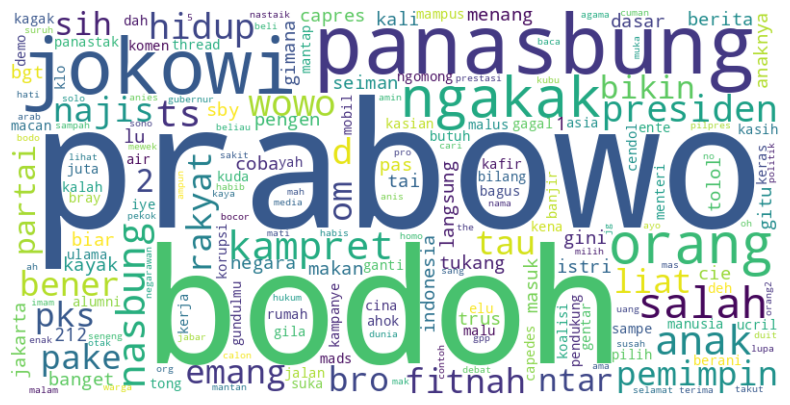

In [28]:
from wordcloud import WordCloud
from collections import Counter

all_words = ' '.join(df['Post Clean']).split()

# Hitung frekuensi kata
word_freq = Counter(all_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud_fufufafa.png', transparent=True, dpi=300)
plt.show()

## 2. Diagaram Batang 10 Kata Sering Muncul

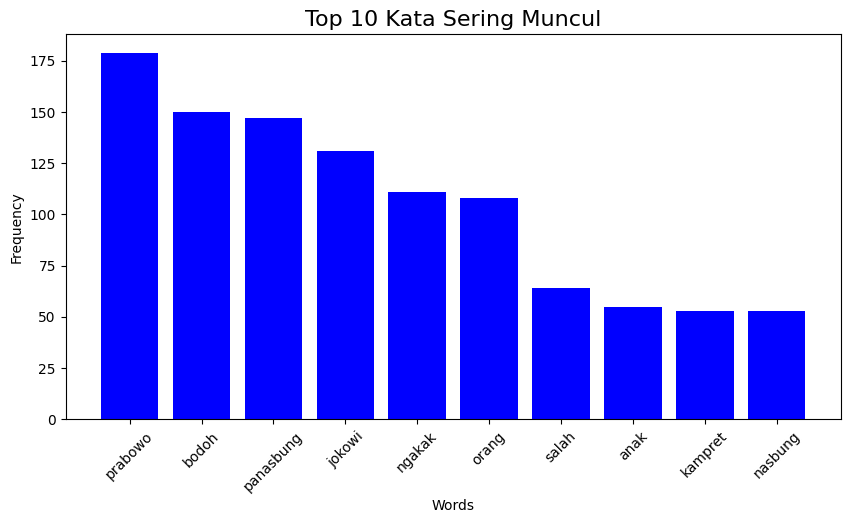

In [12]:
most_common_words = word_freq.most_common(10)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='blue')
plt.title('Top 10 Kata Sering Muncul', fontsize=16)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
# save gambar plt.savefig('diagram_postingan.png', transparent=True, dpi=300)
plt.show()

## 3. TOP 8 Bigram (dua kata berdempetan yang sering muncul)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer # mengubah teks menjadi bag of words [matrix]

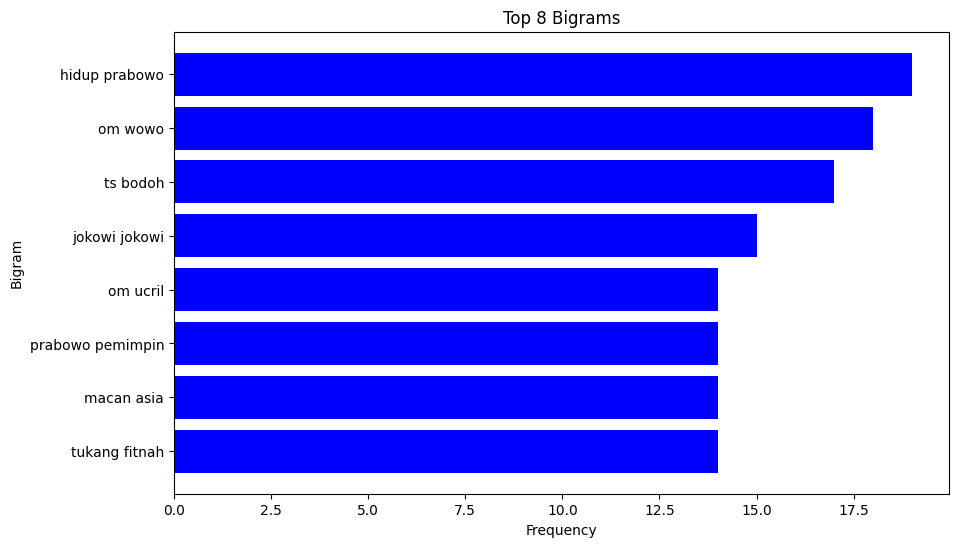

In [14]:
# Membuat bigram menggunakan CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(df['Post Clean'])

# Menghitung frekuensi bigram
bigram_counts = X.sum(axis=0).A1
bigram_features = vectorizer.get_feature_names_out()

# Membuat DataFrame untuk bigram dan frekuensinya
bigram_df = pd.DataFrame({'Bigram': bigram_features, 'Count': bigram_counts})

# Mengurutkan bigram berdasarkan frekuensi
top_bigrams = bigram_df.sort_values(by='Count', ascending=False).head(8)

# Visualisasi dalam diagram batang
plt.figure(figsize=(10, 6))
plt.barh(top_bigrams['Bigram'], top_bigrams['Count'], color='blue')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top 8 Bigrams')
plt.gca().invert_yaxis()  # Membalik urutan untuk menampilkan frekuensi tertinggi di atas
# save gambar plt.savefig('bigram_postingan.png', transparent=True, dpi=300)
plt.show()

## 4. Sentiment Analysis ([Indonesia Sentiment Lexicon](https://github.com/fajri91/InSet))

In [15]:
positive_words = pd.read_csv("/content/positive.tsv", header=None, sep="\t")[0].tolist()
negative_words = pd.read_csv("/content/negative2.tsv", header=None, sep="\t")[0].tolist()

In [18]:
def analyze_sentiment(text):
    words = str(text).split()  # Ubah ke huruf kecil menggunakan casefold dan split menjadi kata-kata
    positive_count = sum(word in positive_words for word in words)
    negative_count = sum(word in negative_words for word in words)

    if positive_count > negative_count:
        return "Positive"
    elif negative_count > positive_count:
        return "Negative"
    else:
        return "Neutral"

In [19]:
df["Sentiment"] = df["Post Clean"].apply(analyze_sentiment)
df.head()

,Date,Replied To,Thread Title,Post Content,Post Clean,Sentiment
0,14-11-2019 09:54,beritafilistin,Perekam Wanita di Kamar Ganti Baju Mall Kerap ...,Dia pasti alumni 212,alumni 212,Neutral
1,01-10-2019 17:38,ibelindua,Gubernur Anies Sampaikan Ancaman Penggantian I...,Gak pernah ngaca ya,ngaca,Neutral
2,28-09-2019 10:56,matadewa909,"Kecewa Ponakan Prabowo Batal Baca Doa, Gerindr...",Alumni 212 mana suaranya,alumni 212 suaranya,Neutral
3,17-09-2019 12:41,SENORITA88,"Pria India Bikin Helm Pakai AC, Kepala Dingin ...",Malah masuk angin ntar,masuk angin ntar,Negative
4,28-08-2019 13:45,matthysse76,"Jokograd & Mandalanusa, Usulan Nama Ibu Kota B...",Wowoland city of kamprets,wowoland city of kamprets,Neutral


In [20]:
df.to_csv('sentiment.csv', index=False) # save dalam bentuk csv

### 4.1 Sentiment Distribution

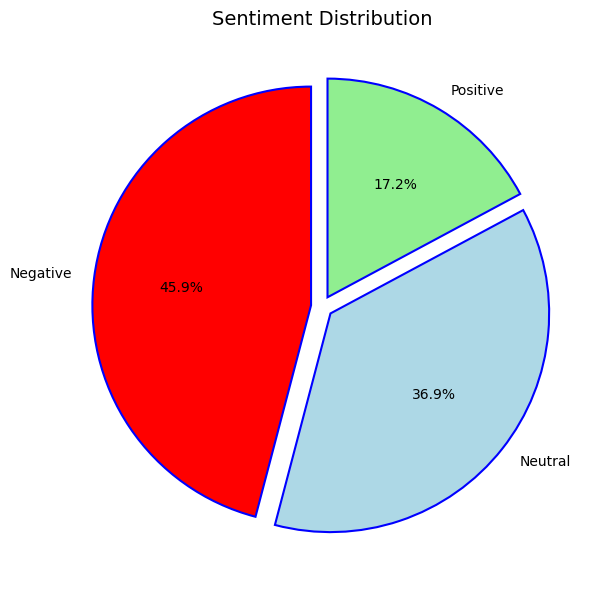

In [21]:
sentiment_distribution = df["Sentiment"].value_counts()

plt.figure(figsize=(8, 6))

explode_values = [0.05] * len(sentiment_distribution)  # Semua potongan dipisahkan sejauh 0.05

sentiment_distribution.plot.pie(
    autopct='%1.1f%%',  # Menampilkan persentase
    colors=["red", "lightblue", "lightgreen"],  # Warna untuk Positive, Neutral, Negative
    labels=sentiment_distribution.index,  # Label sentimen
    startangle=90,  # Rotasi agar potongan pertama dimulai dari atas
    explode=explode_values,  # Pisahkan potongan
    wedgeprops={'edgecolor': 'blue', 'linewidth': 1.5}  # Tambahkan border hitam
)

plt.title("Sentiment Distribution", fontsize=14, color='black')
plt.ylabel("")  # Hapus label default di sumbu y
plt.tight_layout()  # Pastikan layout tidak terpotong

# plt.savefig('sentiment_distribution_postingan.png', transparent=True, dpi=300)
plt.show()

### 4.2 Wordcloud Sentiment Negative

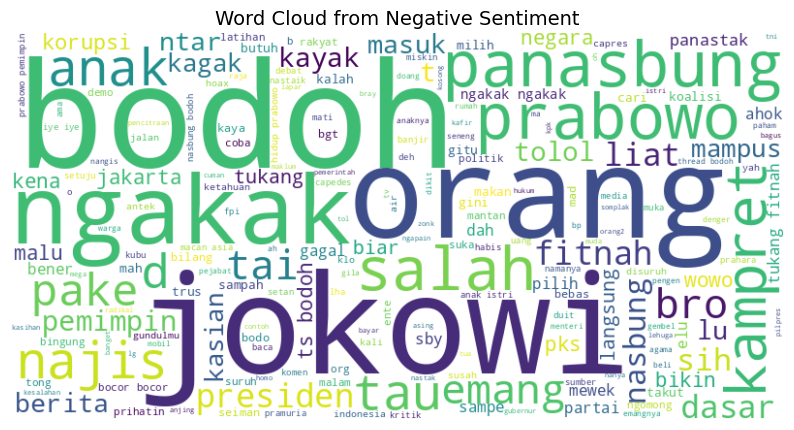

In [22]:
# Menyaring DataFrame untuk hanya mengambil baris dengan Sentiment Negative
negative_df = df[df['Sentiment'] == 'Negative']

# Gabungkan semua teks dalam kolom 'Post Clean' untuk analisis
negative_text = ' '.join(negative_df['Post Clean'])

# Membuat word cloud dari teks yang terkumpul
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menyembunyikan axis
plt.title('Word Cloud from Negative Sentiment', fontsize=14)
# save gambar plt.savefig('wordcloud_negative_postingan.png', transparent=True, dpi=300)
plt.show()

### 4.3 Wordcloud Sentiment Positive

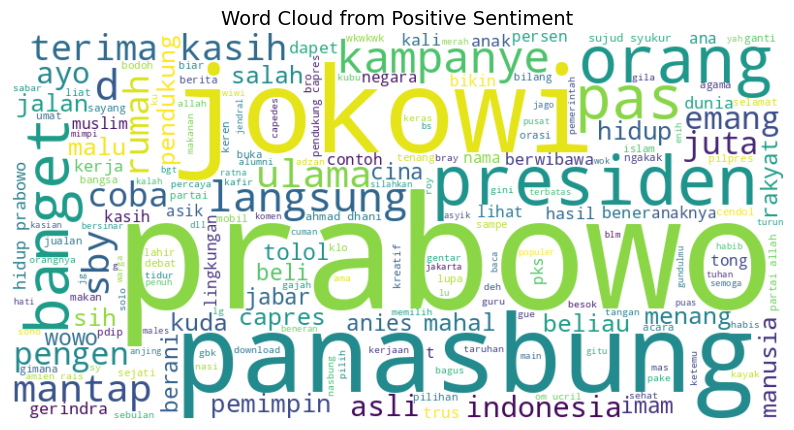

In [23]:
# Menyaring DataFrame untuk hanya mengambil baris dengan Sentiment Negative
positive_df = df[df['Sentiment'] == 'Positive']

# Gabungkan semua teks dalam kolom 'Post Clean' untuk analisis
positive_text = ' '.join(positive_df['Post Clean'])

# Membuat word cloud dari teks yang terkumpul
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menyembunyikan axis
plt.title('Word Cloud from Positive Sentiment', fontsize=14)
# save gambar plt.savefig('wordcloud_positive_postingan.png', transparent=True, dpi=300)
plt.show()

### 4.4 Wordcloud Sentiment Neutral

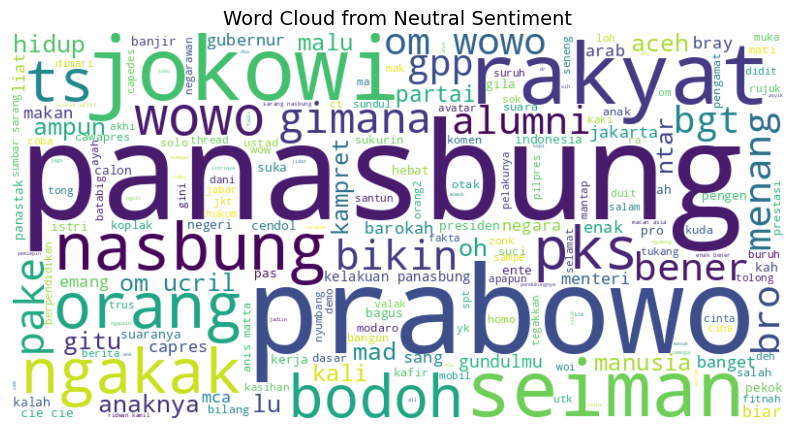

In [29]:
# Menyaring DataFrame untuk hanya mengambil baris dengan Sentiment Negative
neutral_df = df[df['Sentiment'] == 'Neutral']

# Gabungkan semua teks dalam kolom 'Post Clean' untuk analisis
neutral_text = ' '.join(neutral_df['Post Clean'])

# Membuat word cloud dari teks yang terkumpul
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menyembunyikan axis
plt.title('Word Cloud from Neutral Sentiment', fontsize=14)
# save gambar plt.savefig('wordcloud_neutral_postingan.png', transparent=True, dpi=300)
plt.show()

## 5. Time Series Analysis

### 5.1 Time Series Analysis by Post

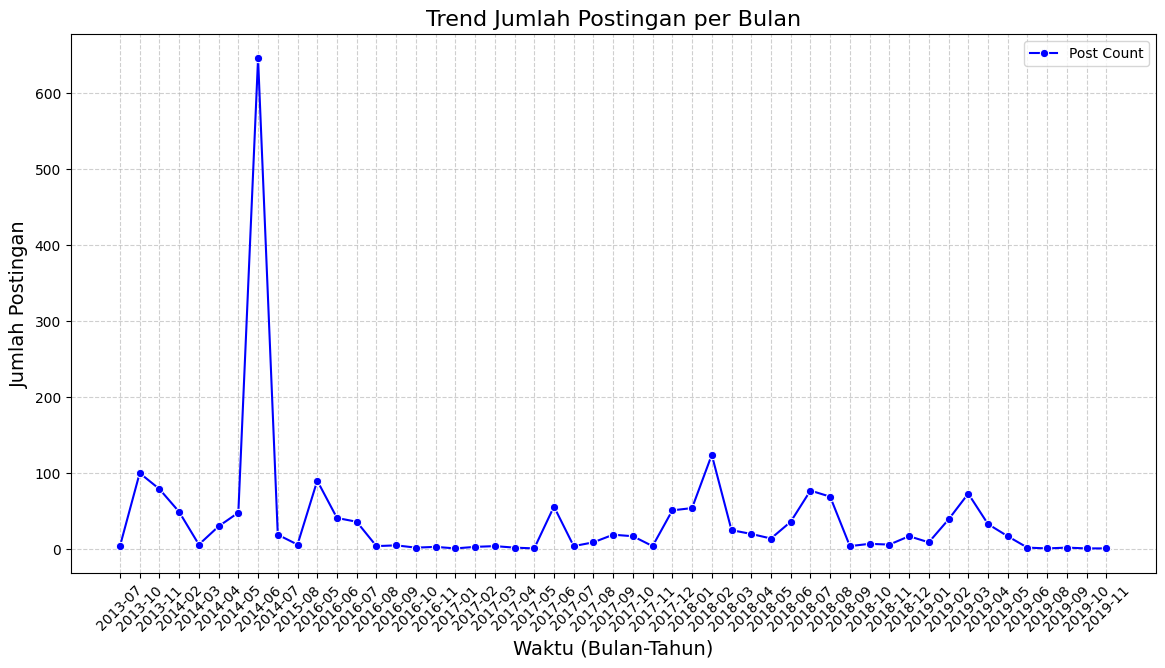

In [25]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y %H:%M')

# Ekstrak Bulan dan Tahun
df['Month'] = df['Date'].dt.to_period('M')  # Ekstrak bulan
df['Year'] = df['Date'].dt.year  # Ekstrak tahun

# Time Series Jumlah Postingan per Bulan
time_series = df.groupby('Month').size().reset_index(name='Post Count')

# Konversi kolom 'Month' menjadi string agar mudah di-plot
time_series['Month'] = time_series['Month'].astype(str)

# Visualisasi Trend Jumlah Postingan per Bulan
plt.figure(figsize=(14, 7))
sns.lineplot(data=time_series, x='Month', y='Post Count', marker='o', label='Post Count', color='blue')
plt.title("Trend Jumlah Postingan per Bulan", fontsize=16)
plt.xlabel("Waktu (Bulan-Tahun)", fontsize=14)
plt.ylabel("Jumlah Postingan", fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.6)
# save gambar plt.savefig('trend_postingan.png', transparent=True, dpi=300)
plt.legend()
plt.show()

### 5.2 Time Series Analysis by Sentiment

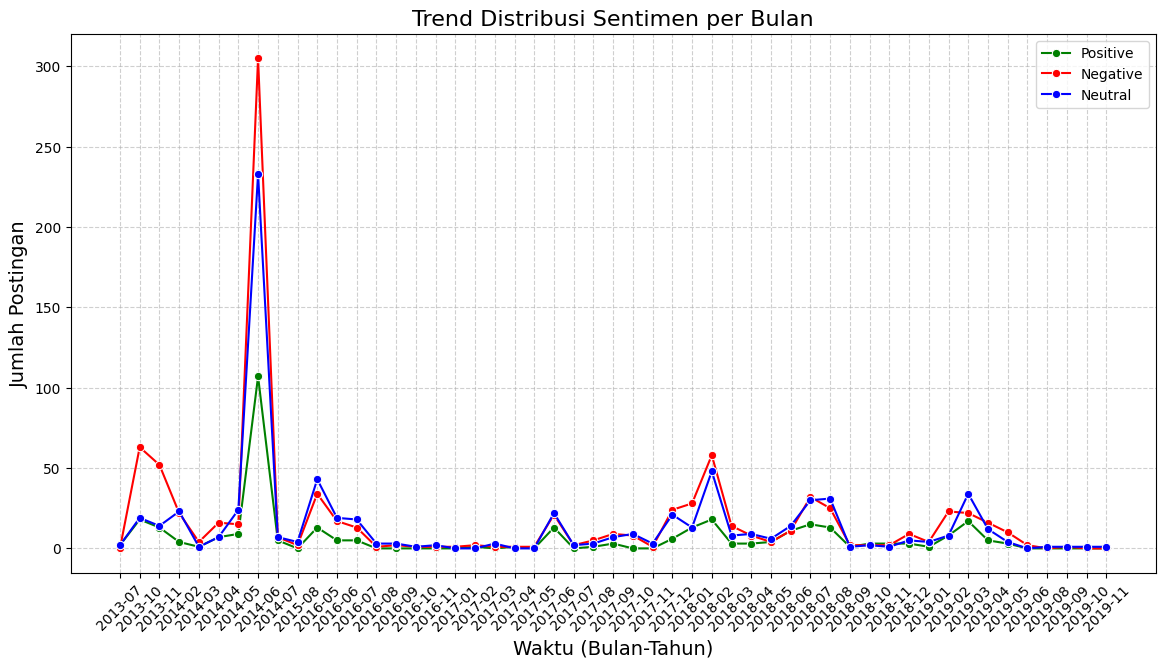

In [26]:
# Time Series Distribusi Sentimen per Bulan
sentiment_per_month = df.groupby(['Month', 'Sentiment']).size().unstack(fill_value=0).reset_index()

# Konversi kolom 'Month' menjadi string agar mudah di-plot
sentiment_per_month['Month'] = sentiment_per_month['Month'].astype(str)

# Visualisasi Trend Distribusi Sentimen per Bulan
plt.figure(figsize=(14, 7))
sns.lineplot(data=sentiment_per_month, x='Month', y='Positive', marker='o', label='Positive', color='green')
sns.lineplot(data=sentiment_per_month, x='Month', y='Negative', marker='o', label='Negative', color='red')
sns.lineplot(data=sentiment_per_month, x='Month', y='Neutral', marker='o', label='Neutral', color='blue')

plt.title("Trend Distribusi Sentimen per Bulan", fontsize=16)
plt.xlabel("Waktu (Bulan-Tahun)", fontsize=14)
plt.ylabel("Jumlah Postingan", fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend()
# save gambar plt.savefig('trend_sentiment_postingan.png', transparent=True, dpi=300)
plt.show()

## 6. Top Replied by User

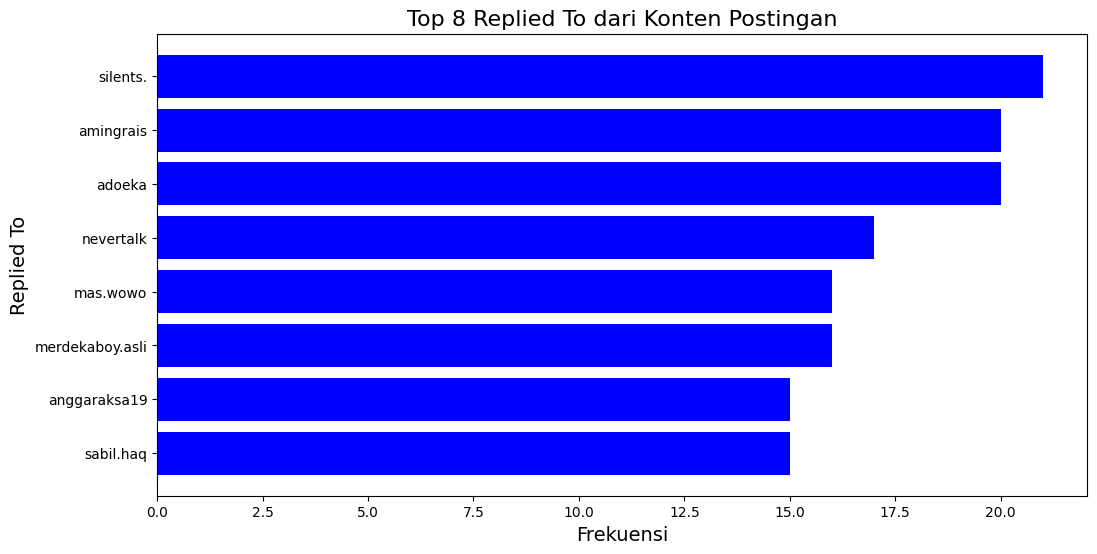

In [27]:
# Hitung jumlah frekuensi setiap 'Replied To'
replied_to_counts = df['Replied To'].value_counts().reset_index()
replied_to_counts.columns = ['Replied To', 'Count']

top_replied_to = replied_to_counts.head(8)

plt.figure(figsize=(12, 6))
plt.barh(top_replied_to['Replied To'], top_replied_to['Count'], color='blue')
plt.xlabel('Frekuensi', fontsize=14)
plt.ylabel('Replied To', fontsize=14)
plt.title('Top 8 Replied To dari Konten Postingan', fontsize=16)
plt.gca().invert_yaxis()  # Balikkan sumbu y agar baris teratas adalah yang terbesar
# save gambar plt.savefig('top_replies.png', transparent=True, dpi=300)
plt.show()